## KNN - K nearest neighbours

Används t.ex. vid film, förelså kommande filmer utefter andra användares filmval

In [115]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [116]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [117]:
wine["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [118]:
wine["data"]

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [119]:
wine["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [120]:
pd.DataFrame(wine["data"])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [121]:
len(wine["feature_names"])

13

In [122]:
pd.DataFrame(wine["data"], columns=wine["feature_names"])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [123]:
df = pd.DataFrame(data=wine["data"], columns=wine["feature_names"])
df["cultivator"] = wine["target"] # byter namn från target till cultivator
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivator
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Annat sätt att tilldela target till dataframen

In [124]:
#df_wine_classes = pd.DataFrame(wine["target"], columns=["wine_class"])
#df_wine_classes.head()

In [125]:
# pd.concat([df, df_wine_classes], axis=1)

In [126]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivator
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [127]:
df["cultivator"].value_counts()

cultivator
1    71
0    59
2    48
Name: count, dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  culti

## Correlation heatmap

<Axes: >

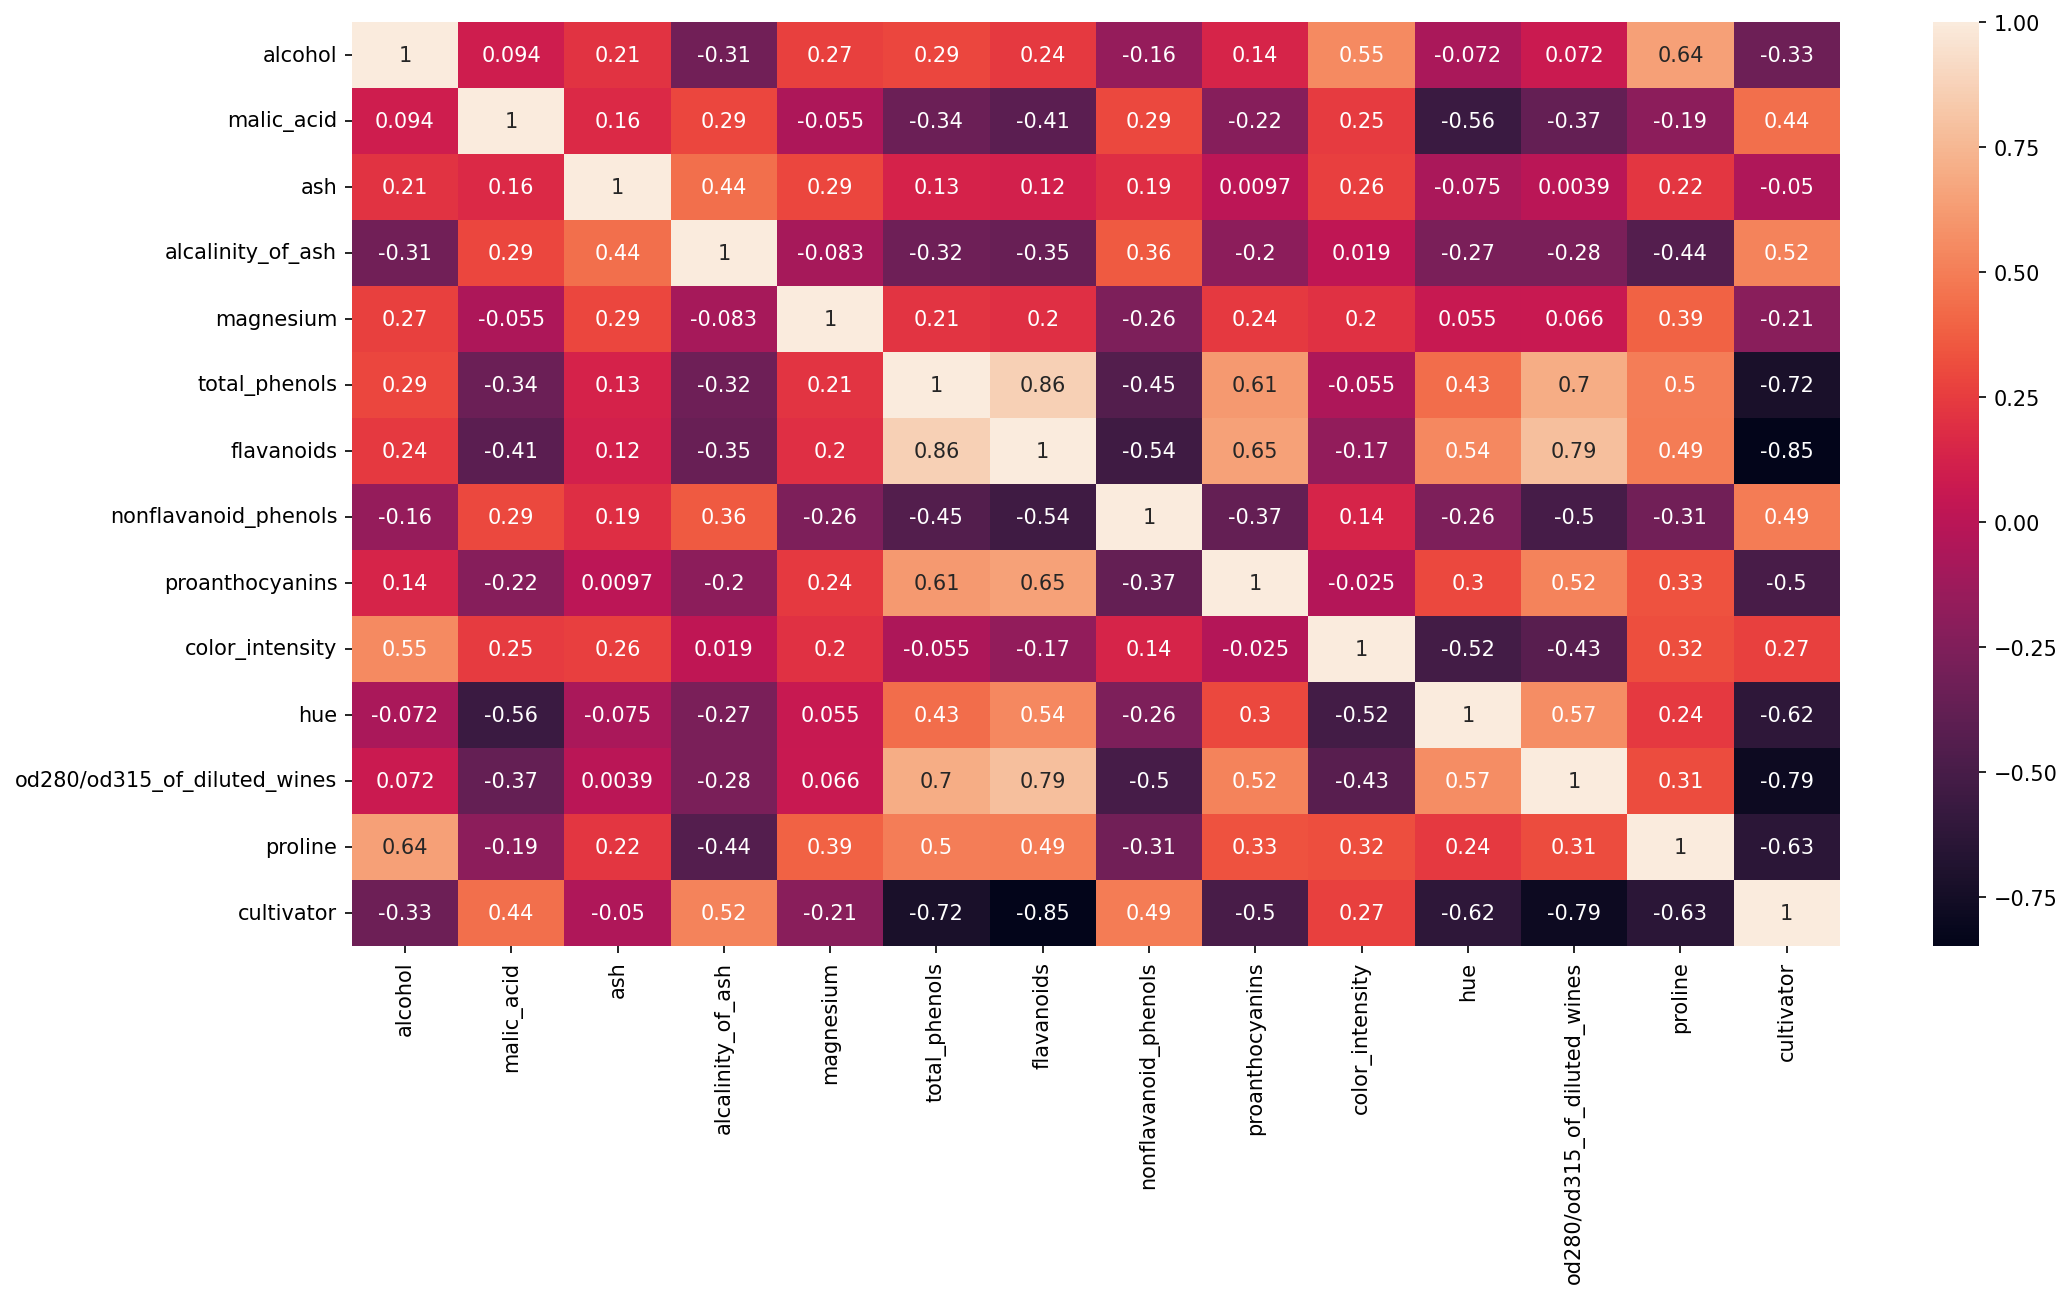

In [129]:
import matplotlib.pylab as plt  
import seaborn as sns

fig,ax = plt.subplots(1, figsize=(16,8), dpi=150)

sns.heatmap(df.corr(), annot=True)

## Kasta grejer som korrelerar "fel", värden nära 1 eller -1

In [130]:
df = df.drop(["ash", "total_phenols", "magnesium"], axis=1)
df.head()

,alcohol,malic_acid,alcalinity_of_ash,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivator
0,14.23,1.71,15.6,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# KNN Dela upp i features och label

In [133]:
X, y = df.drop("cultivator",axis="columns"), df["cultivator"]
X.head()

,alcohol,malic_acid,alcalinity_of_ash,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,11.2,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,18.6,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,16.8,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,21.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [134]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cultivator, dtype: int64

### train test split

In [136]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.5, random_state=42)

### scale dataset

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.min(), scaled_X_train.max(),scaled_X_test.min(), scaled_X_test.max()

(np.float64(0.0),
 np.float64(1.0),
 np.float64(-0.05077262693156731),
 np.float64(1.2428256070640176))

### KNN model

In [143]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       1])

In [145]:
y_test.values

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       1])

## Utvärdera modell

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.97      0.94      0.96        34
           2       0.96      1.00      0.98        22

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



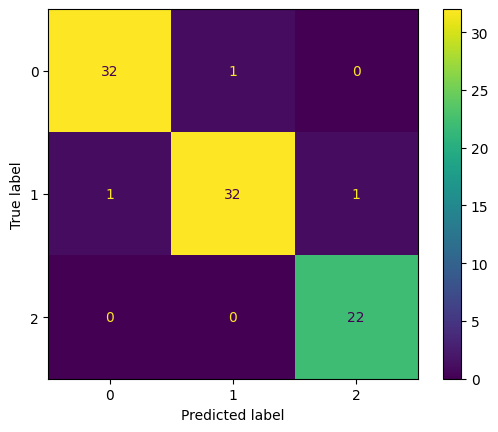

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Tunes hyper parameter K (n_neighbours) with elbow plot

In [ ]:
df["cultivator"].value_counts()

cultivator
1    71
0    59
2    48
Name: count, dtype: int64

In [150]:
# Eftersom spridningen är relativt jämn så använder vi accuracy
from sklearn.metrics import accuracy_score

error = 1-accuracy_score(y_test, y_pred)
error


0.0337078651685393

## Plot a graph of errors in y and k in x

[Text(0.5, 0, 'k neighbours'),
 Text(0, 0.5, 'Error'),
 Text(0.5, 1.0, 'Elbow plot to choose K')]

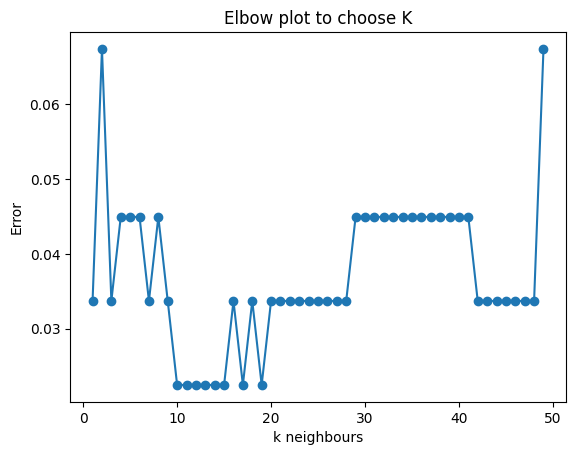

In [ ]:
# Borde ha gjort train val test, tre delar, för nu läcker data till y_test som har n_neighbours inställt på 1

error_list = []
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    
    error = 1 - accuracy_score(y_test, y_pred)
    error_list.append(error)
    
fig,ax = plt.subplots(1)

ax.plot(range(1,50), error_list, '-o')
ax.set(xlabel= "k neighbours", ylabel ="Error", title="Elbow plot to choose K")

Here choose k = 10 or 11 and train on all data (train and test part), save/export model

## To be more robust
- do train|val|test split (use train_test_split twice)
- calculate error based on validation data
- choose k on elbow plot with validation data
- train on train data + validaton data
- evaluate on test data
- export model